Skript to Visualize and Replicate Axtell 99

In [1]:
import matplotlib.pyplot as plt
import dask.dataframe as dd
import pandas as pd
import scipy.signal
import numpy as np

In [320]:
out_dir = "../results/axtell_99"

In [321]:
opttype = 1

In [541]:
run = 999

In [542]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [663]:
path_f = f"{out_dir}/res_firm_agent_run{run}_opttype{opttype}.csv.gz"

In [664]:
path_w = f"{out_dir}/res_worker_agent_run{run}_opttype{opttype}.csv.gz"

In [665]:
path_m = f"{out_dir}/res_model_agent_run{run}_opttype{opttype}.csv.gz"

In [666]:
model_dk = dd.read_csv(path_m, blocksize=None)

In [667]:
worker_dk = dd.read_csv(path_w, blocksize=None)

In [668]:
worker_df = worker_dk.groupby("t").mean().compute()

In [669]:
worker_df

,id,effort,wealth,income,tenure,preference
t,,,,,,
0,1000.0,0.446239,0.777353,0.777353,1.000,0.501897
1,1000.0,0.415251,1.586440,0.809086,1.516,0.501897
2,1000.0,0.396410,2.403211,0.816771,1.778,0.501897
3,1000.0,0.378963,3.192712,0.789501,1.933,0.501897
4,1000.0,0.373599,3.985038,0.792326,2.035,0.501897
...,...,...,...,...,...,...
995,1000.0,0.355768,786.393749,0.753212,2.273,0.501897
996,1000.0,0.362811,787.155167,0.761419,2.166,0.501897
997,1000.0,0.369160,787.929318,0.774150,2.134,0.501897


In [670]:
firm_dk = dd.read_csv(path_f, blocksize=None , dtype={
    "t": "int16",
    "id": "int32",
    "age": "int16",
    "number_employees": "int32",
    "total_effort": "float64",
    "output": "float64",
    "average_pref": "float64"}
)

In [671]:
df = model_dk.compute()

In [672]:
average_number_of_firms = df["total_firms"].mean()

In [673]:
average_number_of_firms

538.381

In [674]:
firm_number = firm_dk.groupby(firm_dk.t).t.size().mean()

In [675]:
workers_check = firm_dk.groupby("t").number_employees.sum().compute()

In [676]:
workers_check

t
0      1000
1      1000
2      1000
3      1000
4      1000
       ... 
995    1000
996    1000
997    1000
998    1000
999    1000
Name: number_employees, Length: 1000, dtype: int32

In [677]:
firm_number.compute()

538.381

In [678]:
width = 390

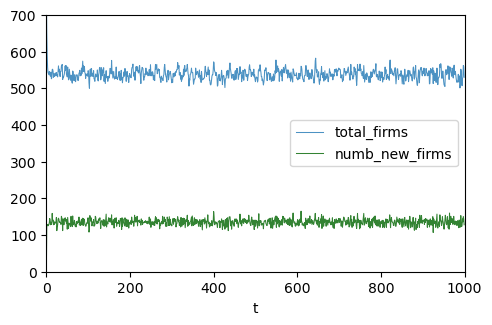

In [679]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,700])
ax.set_xlim([0,1000])
df.plot(kind="line", y = "total_firms", x="t", ax=ax, linewidth=0.75, alpha=0.8)
df.plot(kind="line", y = "numb_new_firms", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

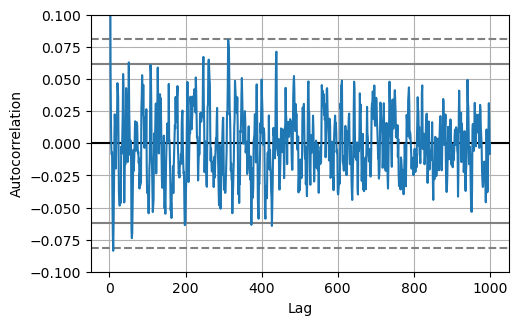

In [680]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([-0.1,0.1])
pd.plotting.autocorrelation_plot(series=df.total_firms, ax = ax)
plt.show()

In [681]:
average_firm = firm_dk.groupby(firm_dk.t).number_employees.mean().compute()

In [682]:
average_firm

t
0      1.265823
1      1.536098
2      1.692047
3      1.795332
4      1.841621
         ...   
995    1.901141
996    1.879699
997    1.779359
998    1.788909
999    1.886792
Name: number_employees, Length: 1000, dtype: float64

In [683]:
max_firm = firm_dk.groupby(firm_dk.t).number_employees.max().compute()

In [684]:
max_firm

t
0       4
1       5
2       6
3       7
4       8
       ..
995    25
996    16
997    10
998    11
999    11
Name: number_employees, Length: 1000, dtype: int32

In [685]:
print(max_firm.mean())

15.434


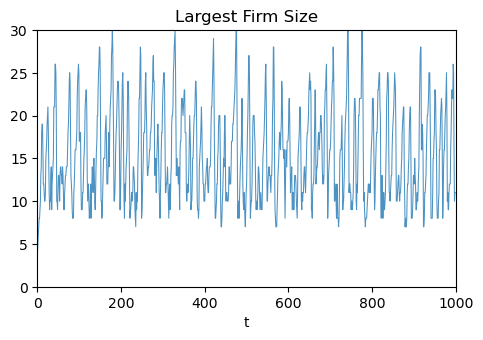

In [686]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,30])
ax.set_xlim([0,1000])
ax.set_title("Largest Firm Size")
max_firm.plot(kind="line", y = "Largest Firm Size", x="t", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

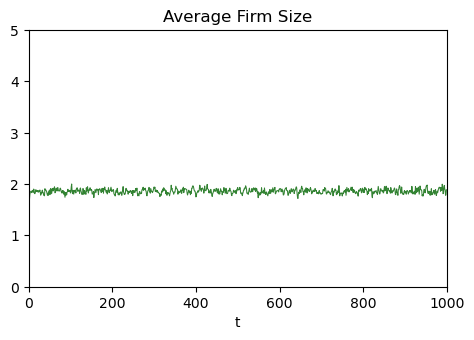

In [687]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,5])
ax.set_xlim([0,1000])
ax.set_title("Average Firm Size")
average_firm.plot(kind="line", y = "Average Firm Size", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

Effort Levels

Average effort level (from worker df)

In [688]:
worker_dk = dd.read_csv(path_w, blocksize=None)

In [689]:
avg_effort = worker_dk.groupby(worker_dk.t).effort.mean().compute()

In [690]:
avg_effort

t
0      0.446239
1      0.415251
2      0.396410
3      0.378963
4      0.373599
         ...   
995    0.355768
996    0.362811
997    0.369160
998    0.372680
999    0.367469
Name: effort, Length: 1000, dtype: float64

In [691]:
firm_dk.assign(avg_e = firm_dk.total_effort/firm_dk.number_employees).groupby(firm_dk.t).number_employees.idxmax()

Dask Series Structure:
npartitions=1
    int64
      ...
Name: number_employees, dtype: int64
Dask Name: series-groupby-idxmax-agg, 8 tasks

In [692]:
filtered_firm_dk = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]].assign(avg_e = firm_dk.total_effort/firm_dk.number_employees)

C:\Users\41782\AppData\Local\Temp\ipykernel_11168\188437644.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .transform(func)
  After:  .transform(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .transform(func, meta=('x', 'f8'))            for series result
  filtered_firm_dk = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]].assign(avg_e = firm_dk.total_effort/firm_dk.number_employees)


In [693]:
avg_effort_maxfirm = filtered_firm_dk.groupby("t").avg_e.mean().compute()

In [694]:
avg_effort_maxfirm

t
0      0.241173
1      0.176044
2      0.315666
3      0.124451
4      0.279657
         ...   
995    0.093986
996    0.067307
997    0.061481
998    0.360527
999    0.330196
Name: avg_e, Length: 1000, dtype: float64

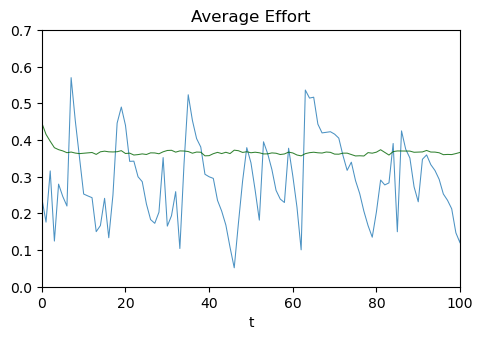

In [695]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,0.7])
ax.set_xlim([0,100])
ax.set_title("Average Effort")
avg_effort_maxfirm.plot(kind="line", y = "avg_e", x="t", ax=ax, linewidth=0.75, alpha=0.8)
avg_effort.plot(kind="line", y = "effort", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

Output Total and Largest Firm

In [696]:
filtered_firm_dk2 = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]]

C:\Users\41782\AppData\Local\Temp\ipykernel_11168\2543161246.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .transform(func)
  After:  .transform(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .transform(func, meta=('x', 'f8'))            for series result
  filtered_firm_dk2 = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]]


In [697]:
output_max_firm = filtered_firm_dk2.groupby("t").output.max().compute()

In [698]:
output_max_firm

t
0       1.993403
1       3.571743
2       6.141727
3       2.465736
4       7.242581
         ...    
995     7.870567
996     2.236653
997     0.992797
998    19.693313
999    23.275882
Name: output, Length: 1000, dtype: float64

In [699]:
output_total = firm_dk.groupby("t").output.sum().compute()

In [700]:
output_total

t
0      777.353455
1      809.086370
2      816.771497
3      789.500896
4      792.326276
          ...    
995    753.212465
996    761.418859
997    774.150425
998    796.609860
999    802.229933
Name: output, Length: 1000, dtype: float64

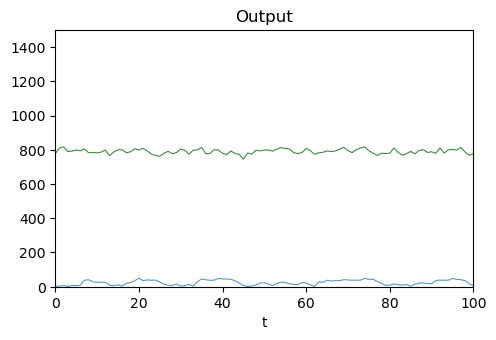

In [701]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,1500])
ax.set_xlim([0,100])
ax.set_title("Output")
output_total.plot(kind="line", y = "output", x="t", ax=ax, linewidth=0.75, alpha=0.8, color="darkgreen")
output_max_firm.plot(kind="line", y = "output", x="t", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

Distribution of Firm Sizes
The distribution of firm sizes across industries has a very characteristic
shape, that of a power law (also commonly known as a scaling law or Pareto
distribution). Data on firm sizes, measured variously, have proven to have
broadly robust power law behavior over many decades and across national
borders, this despite waves of mergers and acquisitions. Power law
distributions of firm sizes are also characteristic of the non-equilibrium
model described above. This is studied in the next section. Following that,
the distribution of firm growth rates yielded by the model is compared with
data. Then, the distribution of firm lifetimes the model produces is studied.
These also follow a power law.
Axtell 99 S.39

Maximum firm age (for sampling period)

In [702]:
max_age = firm_dk["age"].max().compute()

In [703]:
max_age

36

In [704]:
firm_size = firm_dk[["t", "number_employees"]].compute()

In [705]:
dist=firm_size.groupby(["t", "number_employees"]).size()

In [706]:
firm_size2 = firm_size[firm_size.t >= 1]

In [707]:
firm_size2

,t,number_employees
790,1,1
791,1,1
792,1,2
793,1,1
794,1,1
...,...,...
538376,999,1
538377,999,1
538378,999,1
538379,999,1


In [708]:
dist2 = firm_size2.groupby(["number_employees"]).number_employees.size()

In [709]:
dist2.values.sum()

537591

In [710]:
dist2

number_employees
1     296702
2     124329
3      66129
4      27585
5      11637
6       5377
7       2455
8       1182
9        650
10       369
11       272
12       166
13       101
14       105
15        73
16        63
17        48
18        58
19        29
20        53
21        41
22        40
23        31
24        25
25        29
26        11
27         8
28        14
29         2
30         6
33         1
Name: number_employees, dtype: int64

In [711]:
type(dist2)

pandas.core.series.Series

In [712]:
print(dist2.sum())

537591


In [713]:
y_frequency_all = dist2.values/dist2.sum()

In [714]:
y_frequency_all = y_frequency_all.tolist()

In [715]:
y_frequency_all

[0.551910281236107,
 0.2312706127892766,
 0.1230098718170505,
 0.05131224295049582,
 0.02164656774387964,
 0.010002027563705494,
 0.004566668712831874,
 0.002198697522837994,
 0.001209097622542044,
 0.0006863954195661758,
 0.0005059608512791323,
 0.0003087849312953528,
 0.00018787516904114837,
 0.00019531576979525328,
 0.00013579096376241417,
 0.00011718946187715195,
 8.928720904925863e-05,
 0.00010788871093452086,
 5.394435546726043e-05,
 9.858795999188974e-05,
 7.626615772957509e-05,
 7.440600754104886e-05,
 5.766465584431287e-05,
 4.650375471315554e-05,
 5.394435546726043e-05,
 2.0461652073788438e-05,
 1.4881201508209774e-05,
 2.6042102639367104e-05,
 3.7203003770524434e-06,
 1.1160901131157329e-05,
 1.8601501885262217e-06]

In [716]:
x_employees_all = dist2.index.values.tolist()

In [717]:
x_employees_all

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 33]

In [718]:
d = {"Employees": x_employees_all, "Count": y_frequency_all}

In [719]:
df = pd.DataFrame(d)

 powerlaw not good for extreme cases, low and high prune

In [720]:
df_big = df[df.Count > 10**(-5)]

In [721]:
df_big = df_big[1:]

weibull not needed to prune

In [722]:
df_big = df

In [723]:
df_big

,Employees,Count
0,1,0.551910
1,2,0.231271
2,3,0.123010
3,4,0.051312
4,5,0.021647
5,6,0.010002
6,7,0.004567
7,8,0.002199
8,9,0.001209
9,10,0.000686


In [724]:
x_new = df_big.Employees
y_new = df_big.Count

function to sample firm size (employee) distribution for different t's

In [725]:
def sample_dist(dist, start, max_age, numb_samples):
    df_list = []
    for x in range(numb_samples):
        i = start + x * max_age
        sample = dist.loc[i, :]
        freq = sample / sample.sum()
        freq_df = freq.reset_index(inplace=False)
        freq_df = freq_df.rename(columns={0: f"Frequency{x}"})
        df_list.append(freq_df)
    return df_list

In [726]:
dfs = sample_dist(dist, 1, 10, 10)

In [727]:
from functools import reduce

In [728]:
df3 = reduce(lambda left,right: pd.merge(left,right,on=["number_employees"], how="outer"), dfs)

In [729]:
df3

,number_employees,Frequency0,Frequency1,Frequency2,Frequency3,Frequency4,Frequency5,Frequency6,Frequency7,Frequency8,Frequency9
0,1,0.597542,0.560662,0.547135,0.567029,0.550943,0.575269,0.545279,0.532957,0.539326,0.572451
1,2,0.298003,0.218750,0.236599,0.215580,0.224528,0.241935,0.213873,0.250471,0.219101,0.223614
2,3,0.081413,0.123162,0.134935,0.141304,0.122642,0.093190,0.129094,0.124294,0.140449,0.130590
3,4,0.016897,0.060662,0.049908,0.039855,0.050943,0.044803,0.063584,0.052731,0.067416,0.039356
4,5,0.006144,0.020221,0.012939,0.016304,0.033962,0.025090,0.021195,0.011299,0.022472,0.023256
5,6,NaN,0.011029,0.005545,0.009058,0.007547,0.007168,0.009634,0.013183,0.003745,0.003578
6,7,NaN,0.003676,0.001848,0.001812,0.003774,0.005376,0.005780,0.007533,NaN,0.001789
7,19,NaN,0.001838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,NaN,NaN,0.003697,0.001812,NaN,0.003584,0.005780,0.001883,0.003745,0.001789
9,9,NaN,NaN,0.003697,0.005435,0.003774,0.001792,0.001927,0.001883,0.001873,NaN


In [730]:
df3['avg'] = df3.iloc[:,1:].mean(axis=1)

In [731]:
# df3['size'] = df3.iloc[:,1:].size(axis=1)

In [732]:
df3 = df3.iloc[1:20,:]

In [733]:
dfplot = df3[["number_employees", "avg"]]

In [734]:
x_employees = df3["number_employees"].values.tolist()

In [735]:
y_frequency = df3["avg"].values.tolist()

In [736]:
y_frequency

[0.23424538205069173,
 0.12210740772969178,
 0.04861539957598528,
 0.019288196514041817,
 0.007832002147706164,
 0.003948579361283352,
 0.001838235294117647,
 0.0031843563392080156,
 0.002911431500240573,
 0.0018484288354898336,
 0.0018186688005713927,
 0.001873871882625466,
 0.0018867924528301887,
 0.0018594484844717922,
 0.0018832391713747645,
 0.0018726591760299626,
 0.0017889087656529517]

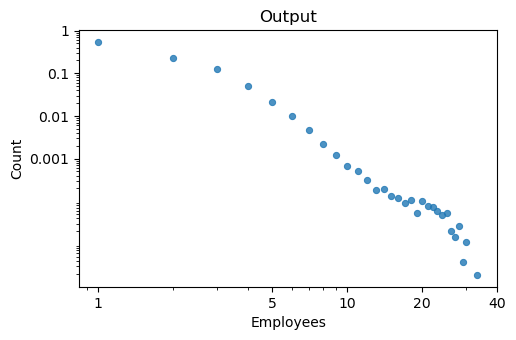

In [737]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
#ax.set_ylim([0,0.4])
#ax.set_xlim([0,100])
ax.set_title("Output")
ticks = (1,5,10,20, 40)
ticksy = (0.001, 0.01, 0.1, 1)
df_big.plot("Employees","Count",kind="scatter", ax=ax, linewidth=0.75, alpha=0.8, loglog=True)
ax.set_xticks(ticks=ticks)
ax.set_xticklabels(labels=ticks)
ax.set_yticks(ticks=ticksy)
ax.set_yticklabels(labels=ticksy)
plt.show()

Fit the firmsize power-law data

In [738]:
# Function to calculate the power-law with constants a and b
def power_law(x, b):
    return np.power(x, -(1+b), dtype=float)

In [739]:
def weibull(x, a, b):
    return 1-np.exp(-a*x**b, dtype=float)

def gld(x, a, b):
    return 1-(1+a*x/b)**((-1)/a)

In [740]:
from scipy.optimize import curve_fit

In [741]:
pars, cov = curve_fit(f=power_law, xdata= x_new, ydata=y_new, p0=0, bounds=(-np.inf, np.inf))

In [742]:
pars2, cov2 = curve_fit(f=weibull, xdata= x_new, ydata=y_new, p0=[0,0], bounds=(-np.inf, np.inf))

In [743]:
# not found optima
# pars3, cov3 = curve_fit(f=gld, xdata= x_new, ydata=y_new, p0=[0,0], bounds=(-np.inf, np.inf))

Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)

In [744]:
stdevs = np.sqrt(np.diag(cov))

In [745]:
stdevs2 = np.sqrt(np.diag(cov2))

Calculate the residuals

In [746]:
res = y_new - power_law(x_new, *pars)

In [747]:
ss_res = np.sum(res**2)

In [748]:
ss_res

0.2022037289540435

In [749]:
ss_tot = np.sum((y_new-np.mean(y_new))**2)

In [750]:
ss_tot

0.3441941118540469

In [751]:
res2 = y_new - weibull(x_new, *pars2)

In [752]:
ss_res2 = np.sum(res2**2)

In [753]:
ss_tot2 = np.sum((y_new-np.mean(y_new))**2)

In [754]:
r_squared = 1-(ss_res/ss_tot)

In [755]:
r_squared

0.41252995914181534

In [756]:
r_squared2 = 1-(ss_res2/ss_tot2)

In [757]:
r_squared2

0.990388228006221

In [758]:
pars

array([1.11151685])

In [759]:
pars2

array([ 0.82791935, -1.86409421])

In [760]:
test = dist.loc[500, :]

In [761]:
test

number_employees
1     270
2     119
3      72
4      35
5      10
6       7
7       2
8       1
10      1
12      1
dtype: int64

In [1281]:
frequency = test/test.sum()

In [1282]:
freq_df = frequency.reset_index(inplace=False)

In [1283]:
freq_df = freq_df.rename(columns={0:"Frequency"})

In [1284]:
freq_df

,number_employees,Frequency
0,1,0.877863
1,2,0.045802
2,3,0.012723
3,4,0.007634
4,5,0.005089
5,9,0.002545
6,11,0.005089
7,13,0.002545
8,15,0.002545
9,16,0.002545


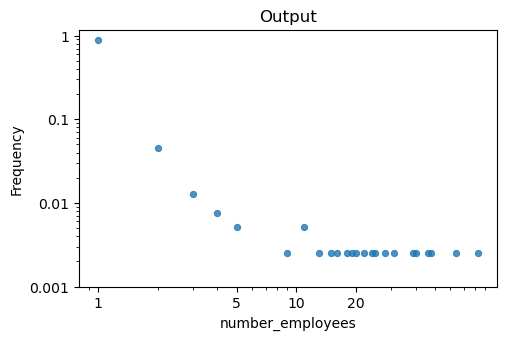

In [1285]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
#ax.set_ylim([0,0.4])
#ax.set_xlim([0,100])
ax.set_title("Output")
ticks = (1,5,10,20)
ticksy = (0.001, 0.01, 0.1, 1)
freq_df.plot("number_employees","Frequency",kind="scatter", ax=ax, linewidth=0.75, alpha=0.8, loglog=True)
ax.set_xticks(ticks=ticks)
ax.set_xticklabels(labels=ticks)
ax.set_yticks(ticks=ticksy)
ax.set_yticklabels(labels=ticksy)
plt.show()

Overall Behavior of Agents, I (Population Cross-Section)

In [1287]:
effort_dist = worker_dk[["t", "effort"]].compute()
dist_e = effort_dist.groupby(["t", "effort"]).size()

In [1288]:
dist_e

t     effort
0     0.000     1
      0.001     1
      0.002     1
      0.004     1
      0.005     1
               ..
9999  0.991     1
      0.992     1
      0.993     3
      0.995     2
      1.000     1
Length: 3128326, dtype: int64

In [1289]:
dfs_e = sample_dist(dist_e, 300, 30, 200)

df_e = reduce(lambda left, right: pd.merge(left, right, on=["effort"], how="outer"), dfs_e)
df_e['avg'] = df_e.iloc[:, 1:].mean(axis=1)
df_e = df_e.iloc[1:, :]
dfplot_e = df_e[["effort", "avg"]]
x_effort = df_e["effort"].values.tolist()
y_frequency_e = df3["avg"].values.tolist()

C:\Users\41782\AppData\Local\Temp\ipykernel_28596\1970194139.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_e['avg'] = df_e.iloc[:, 1:].mean(axis=1)


In [1290]:
y_frequency_e

[0.043926304286567915,
 0.01734054022017244,
 0.009466408757418845,
 0.007348823069979646,
 0.004662538567772348,
 0.005569659968564974,
 0.004235141180281781,
 0.004270341275745999,
 0.004174573632629083,
 0.0036993737394363335,
 0.002936235256834155,
 0.0029876022262386214,
 0.0029689555783092097,
 0.003467837954957268,
 0.003035104817091992,
 0.0027709855046361438,
 0.0029055272417444133,
 0.0032526515599031504,
 0.0027393202721122593,
 0.003101677734030675,
 0.0032320168294326422,
 0.003873719871569245,
 0.002932517295767996,
 0.002937649300874684,
 0.003489896784568851,
 0.0035897531335355847,
 0.003328993086043074,
 0.0027302386296896948,
 0.0031235402024802476,
 0.002855422476875555,
 0.002825728945805643,
 0.003115264797507788,
 0.004461939525790699,
 0.0039735373737670885,
 0.003942606397180725,
 0.0029407701528044797,
 0.004174707730585815,
 0.0029676342787630125,
 0.002907861369399831,
 0.0029585798816568047,
 0.004188378071750528,
 0.0033179584328583583,
 0.0031788873894137

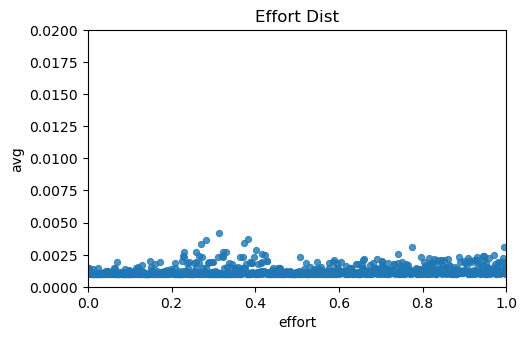

In [1296]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,0.02])
ax.set_xlim([0,1])
ax.set_title("Effort Dist")
dfplot_e.plot("effort","avg",kind="scatter", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()